In [1]:
import json
import glob

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_theme(rc={'figure.figsize':(7, 16)})
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_color_codes("colorblind")
sns.set_theme(style="white")
sns.set_context("talk")
sns.color_palette()
%matplotlib inline

In [4]:
categories = ['baseline', 'reconstruction', 'recollection', 'recitation']
subcategories = ['code', 'natural_language', 'all']
types = ['pearson', 'spearman', 'xi']
ids = ['2024-06-05_14-56-53']

In [5]:
NameChanges = {
    'roc': 'ROC',
    'pr': 'PR',
    'ece': 'ECE',
    '0_8_templates': 'Textual Matches' ,
    '0_8_snowclones': 'Semantic Matches',
    'max_frequency': 'Max Token Freq',
    'min_frequency': 'Min Token Freq',
    'avg_frequency': 'Mean Token Freq',
    'median_frequency': 'Median Token Freq',
    'p25_frequency': 'P25 Token Freq',
    'p75_frequency': 'P75 Token Freq',
    'generation_perplexity': 'Continuation PPL',
    'prompt_perplexity': 'Prompt PPL',
    'sequence_perplexity': 'Sequence PPL',
    'sequence_duplicates': 'Duplicates',
    'huffman_coding_length': 'Huffman Length'
}

def setname(name):
    if not isinstance(name, str):
        return name
    if name in NameChanges:
        return NameChanges[name]
    else:
        return ' '.join(word.capitalize() for word in name.split('_'))

2024-06-05_14-56-53


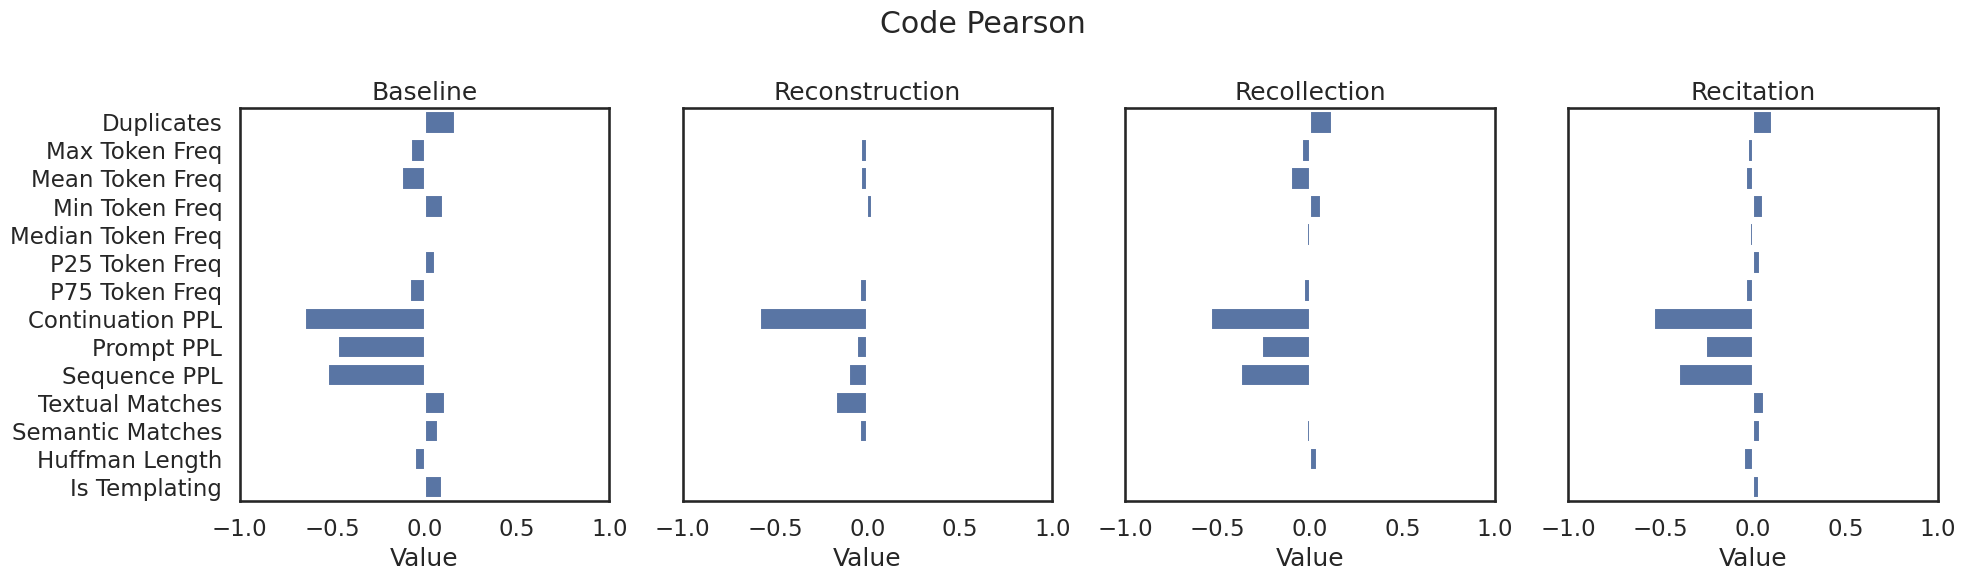

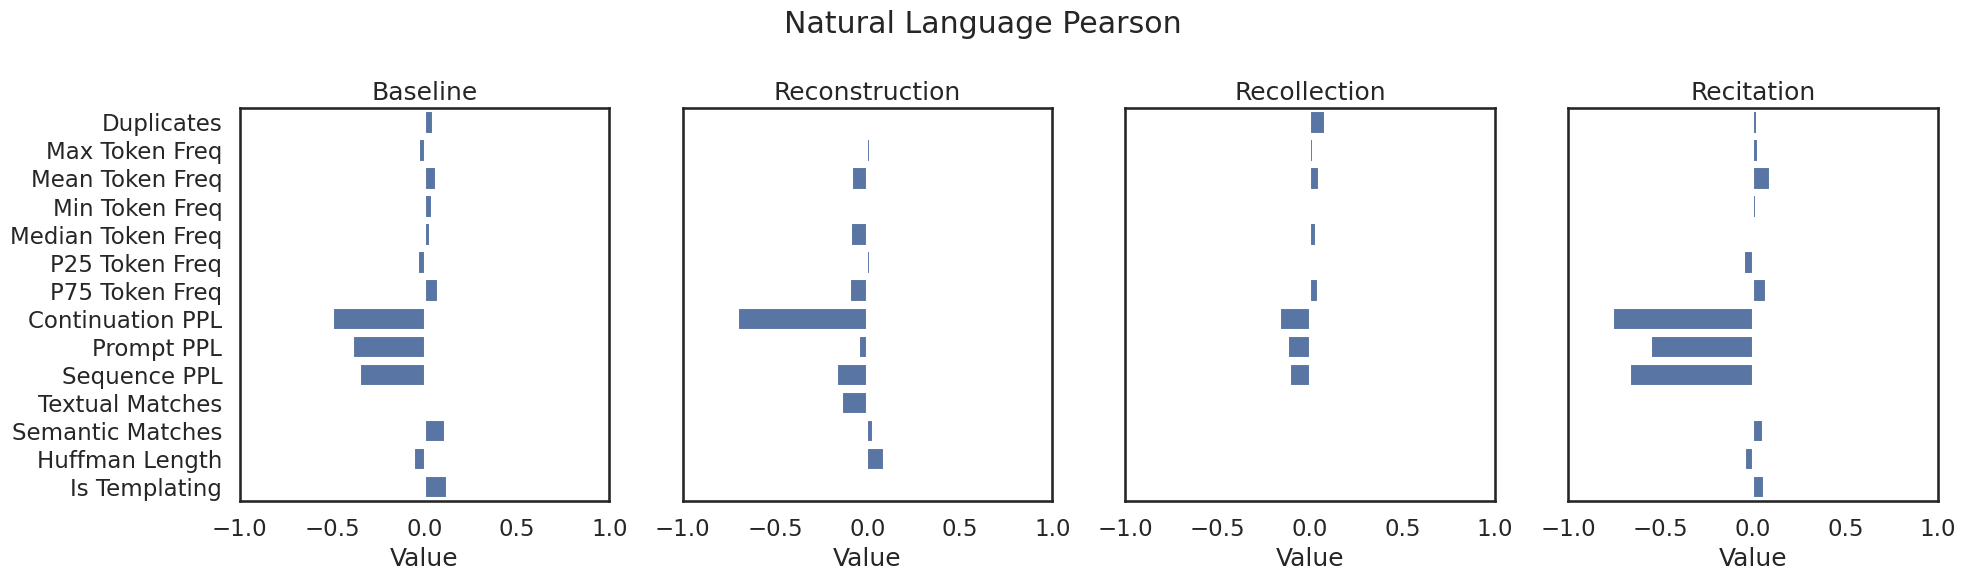

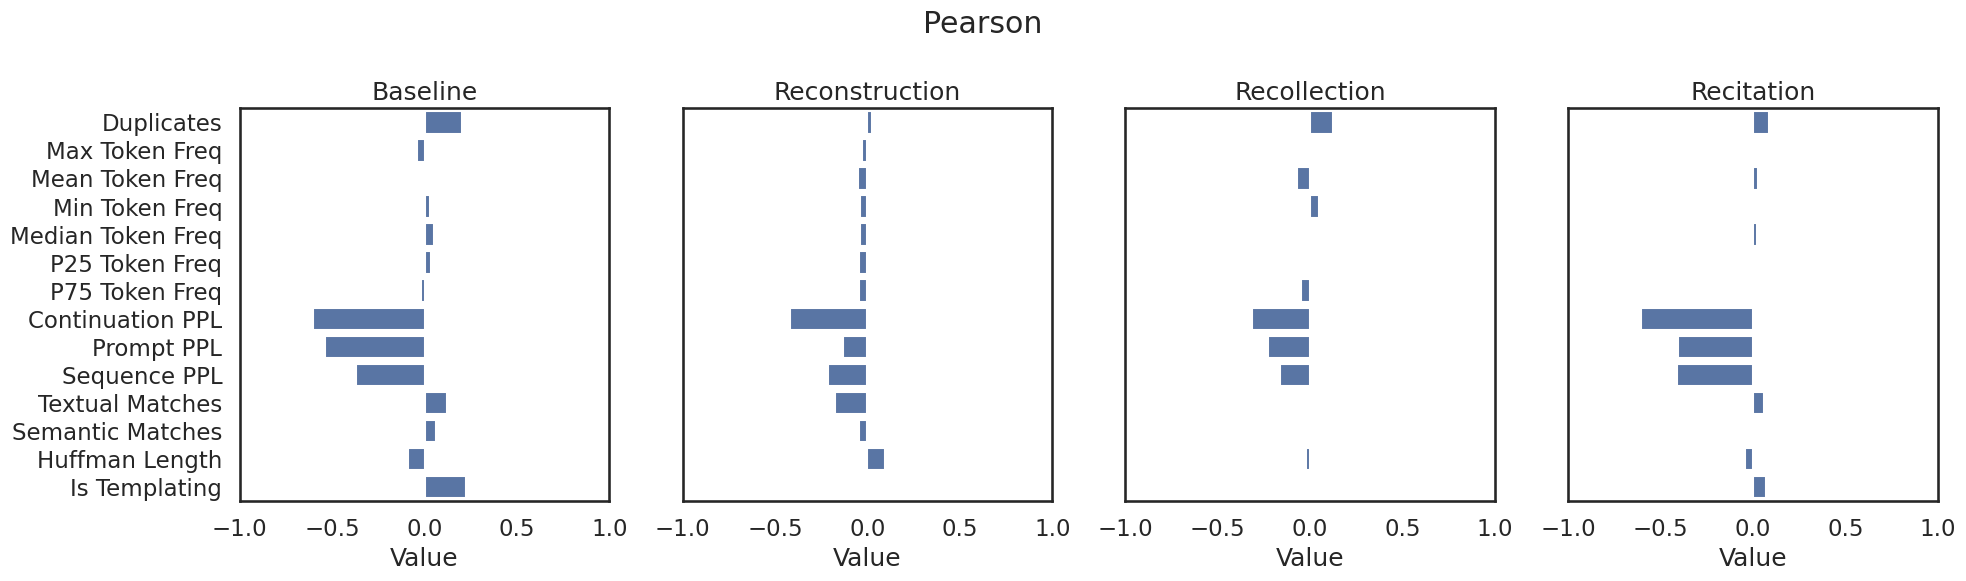

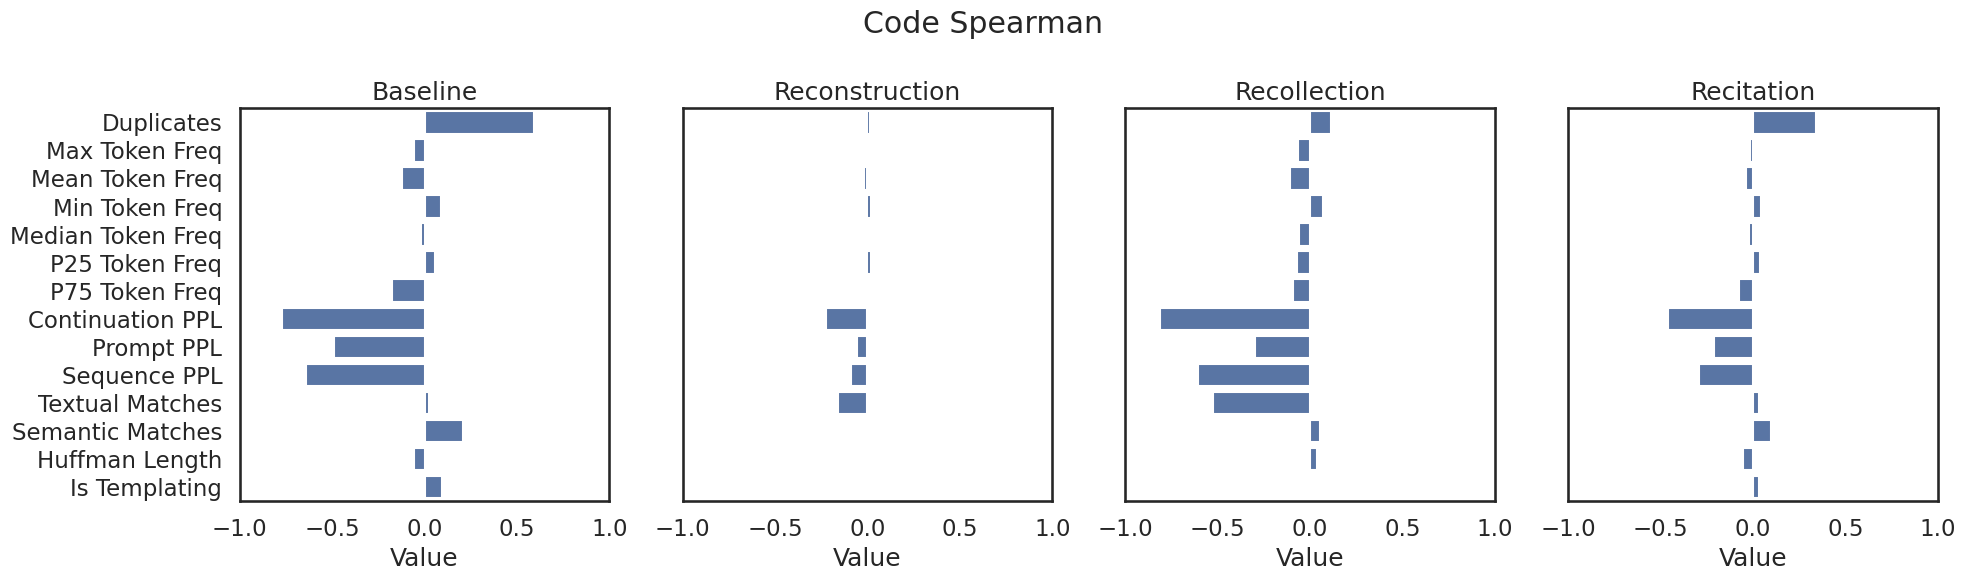

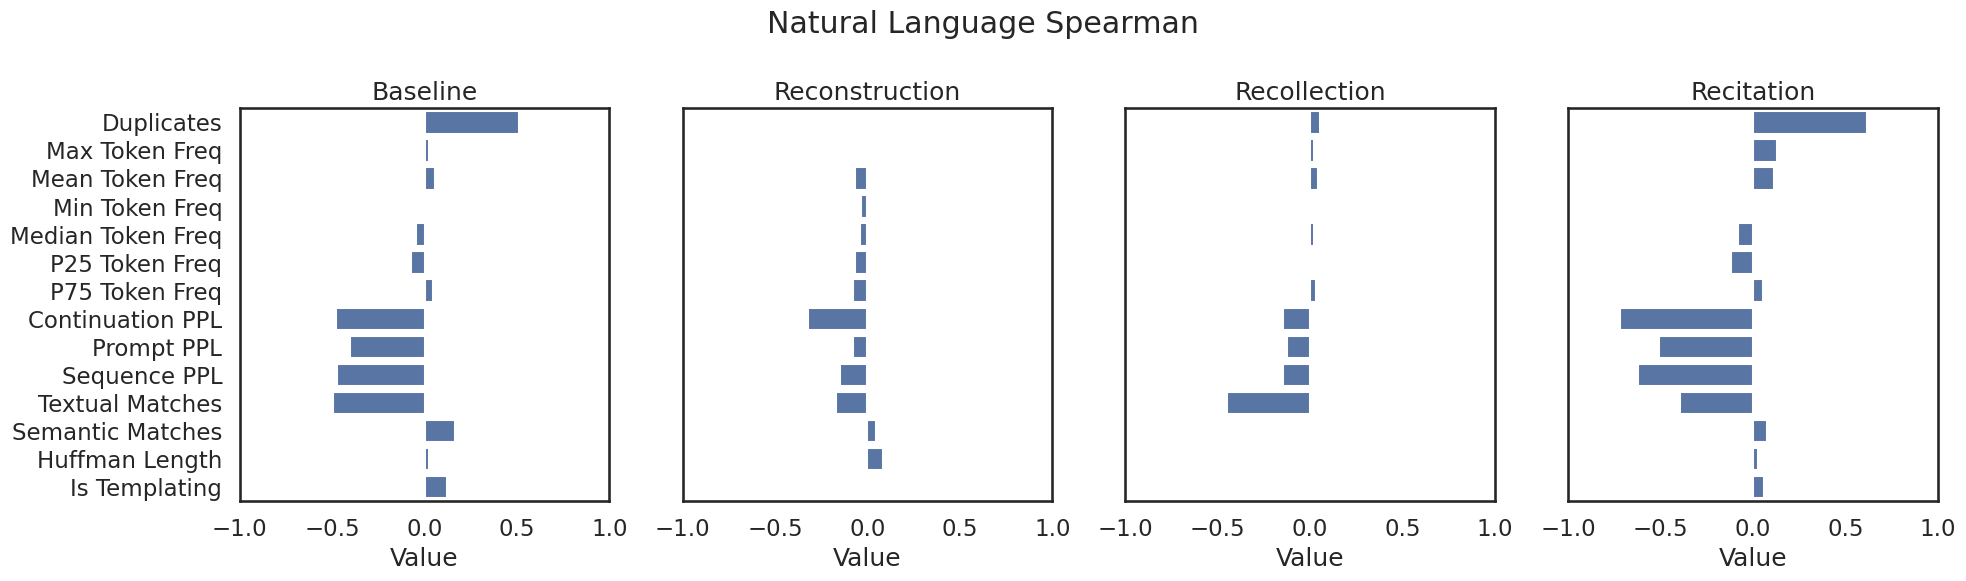

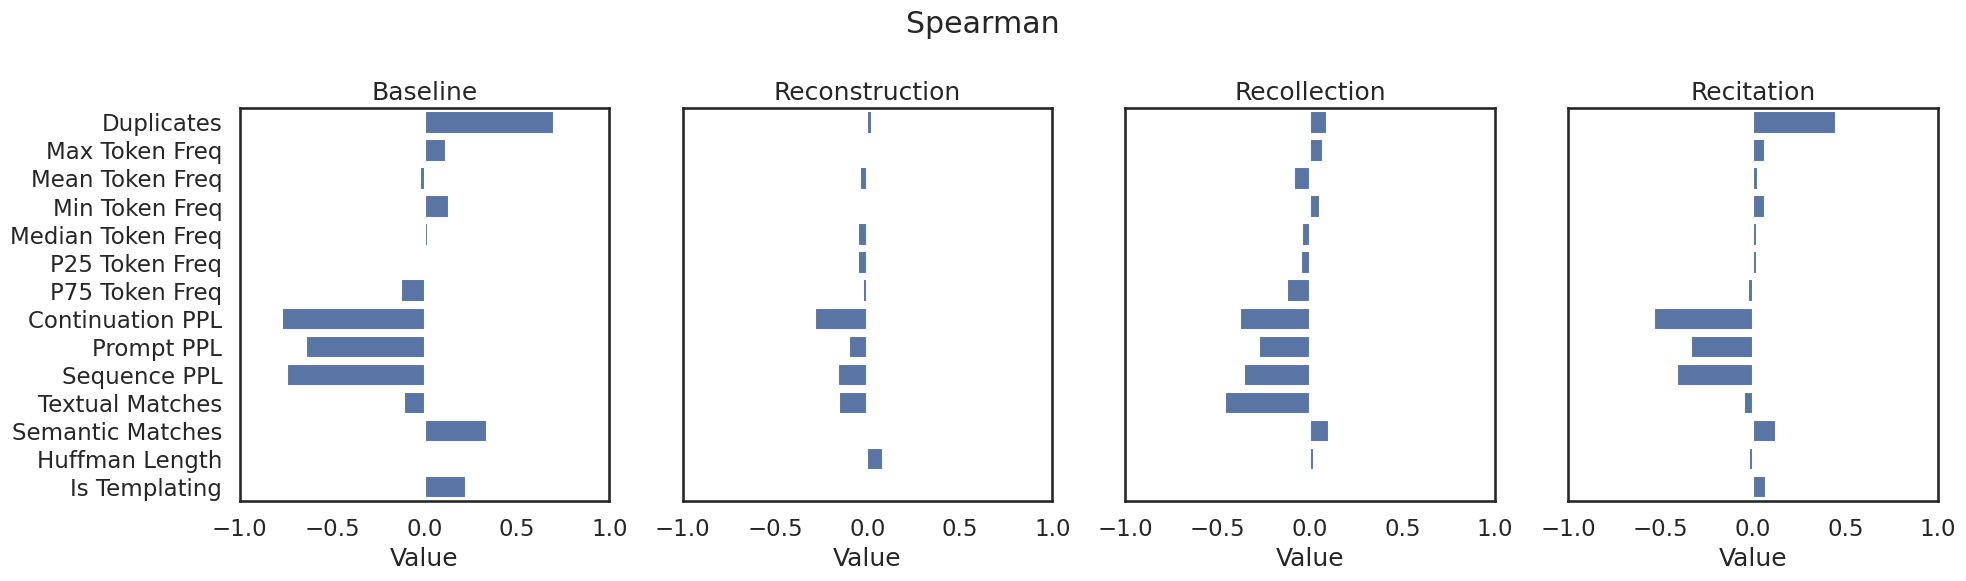

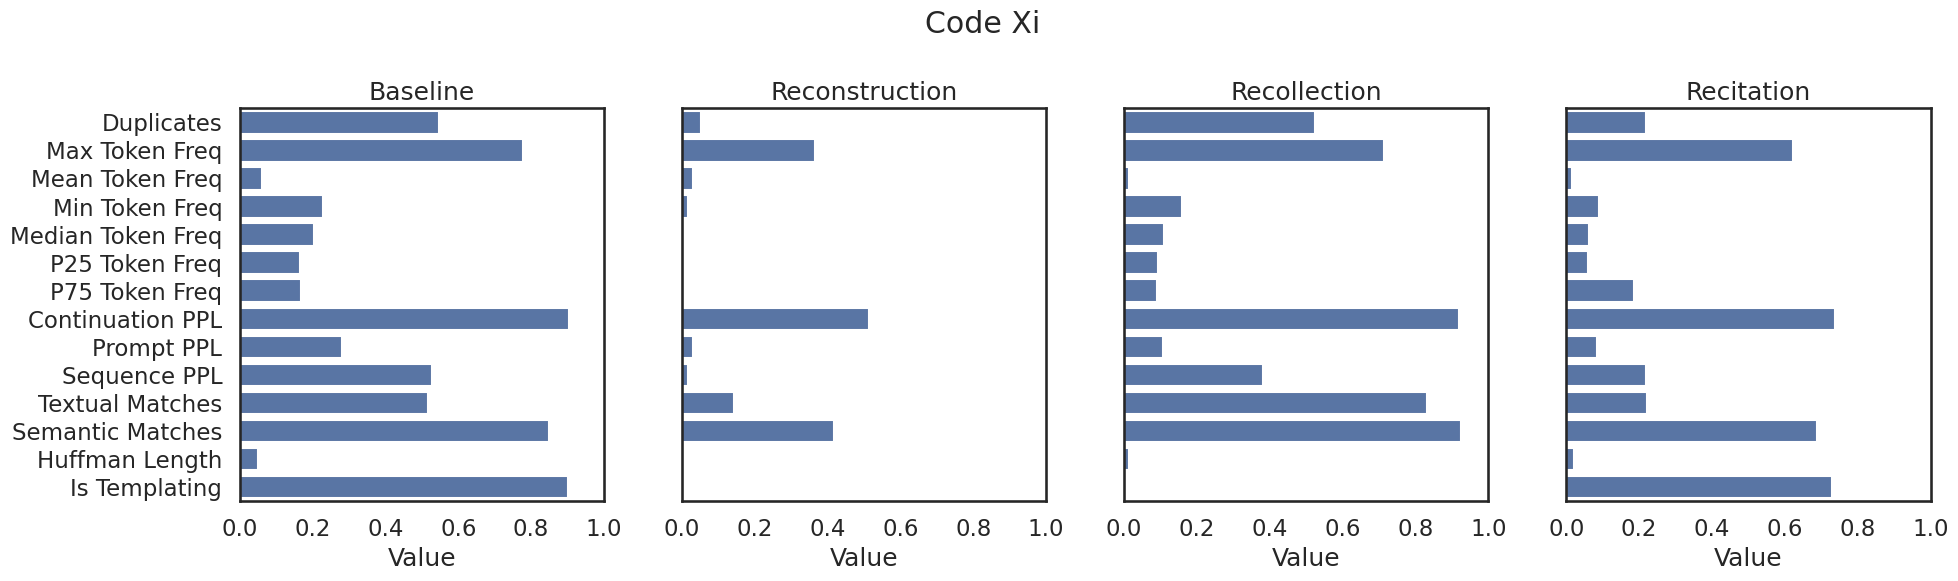

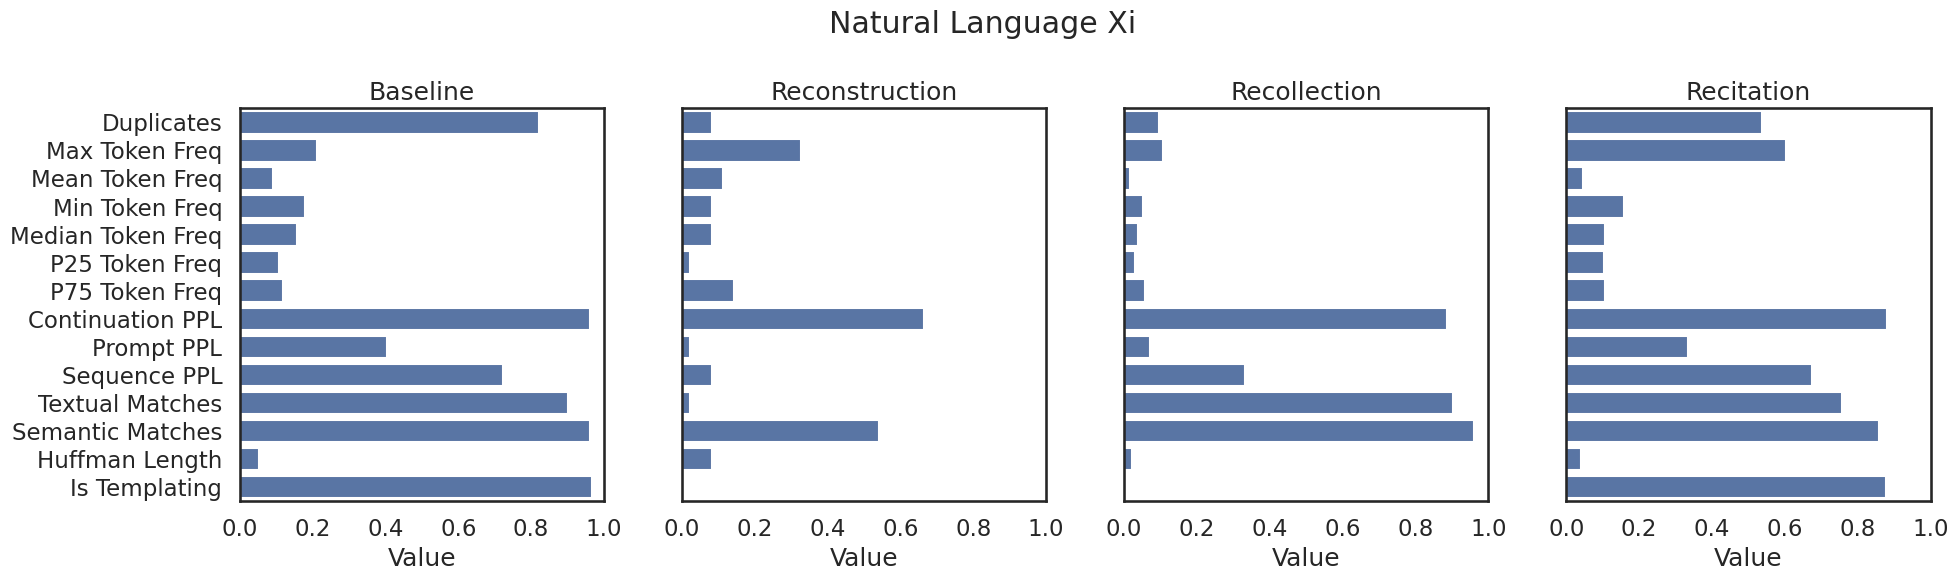

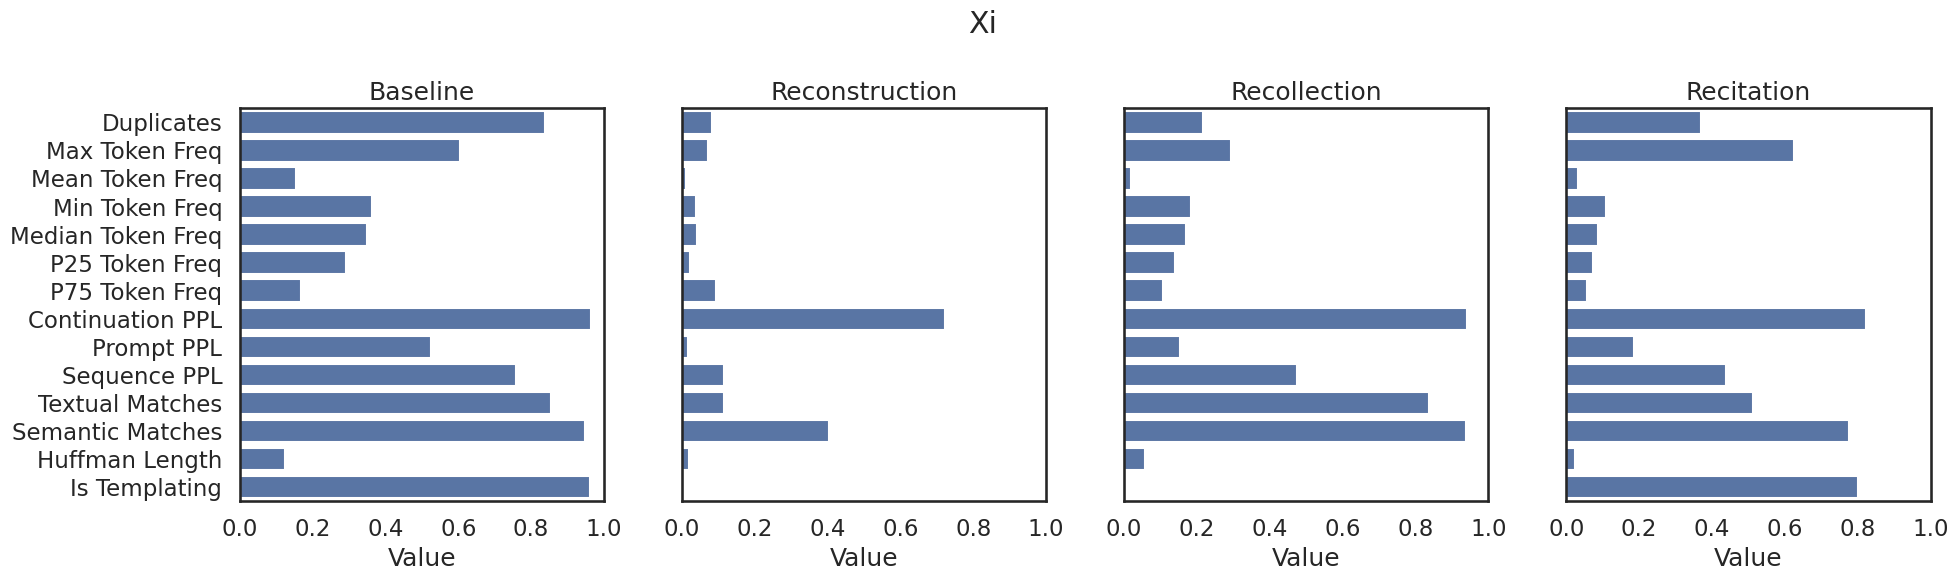

In [6]:
for id in ids:
    print(id)
    coefficients = json.load(open(f'/mnt/ssd-1/sai/semantic-memorization/experiments/{id}/deduped/12b/correlation_coefficients.json'))
    
    for t in types:
        for subcat in subcategories:
            fig, axs = plt.subplots(1, 4, figsize=(20, 6), sharey=True)
            for i, cat in enumerate(categories):
                combined = [(l[0], l[1]) for l in coefficients[cat][subcat][t]]
                combined = pd.DataFrame(combined, columns=['Feature', 'Value'])
                for col in combined.columns:
                    combined[col] = combined[col].apply(setname)
                sns.barplot(data=combined, x='Value', y='Feature', ax=axs[i])
                axs[i].set_title(cat.capitalize())
                axs[i].set_ylabel("")
        
                if t != 'xi':
                    axs[i].set_xlim(-1.0, 1.0)
                else:
                    axs[i].set_xlim(0.0, 1.0)
            if subcat == "all":
                plt.suptitle(setname(t))
            else:
                plt.suptitle(setname(subcat) + " " + setname(t))
            plt.tight_layout()
            plt.savefig(subcat + "_" + t + ".png", bbox_inches="tight")
            plt.show()